In [14]:
import os
os.chdir('/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2')

In [15]:
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from utils.load_data import load_data_with_mapping, load_patient_with_mapping

In [16]:
DATA_PATH = "./data/data_25ms_h=0%_16mfcc_RMT-HRK.json"

In [17]:
X, y, mapping = load_patient_with_mapping(DATA_PATH)

print(X.shape)
print(y.shape)

Dataset loaded !
(198836, 1, 16)
(198836,)


In [18]:
# plot Total Segments for each class
def plot_segments(y, mapping):
    plt.figure(figsize=(10, 5))
    values, counts = np.unique(y, return_counts=True)
    print(values, counts)
    plt.bar([mapping[val] for val in values], counts)
    plt.xlabel('Classes')
    plt.ylabel('Total Segments')
    plt.title('Total Segments for each class')

[0 1] [ 87106 111730]


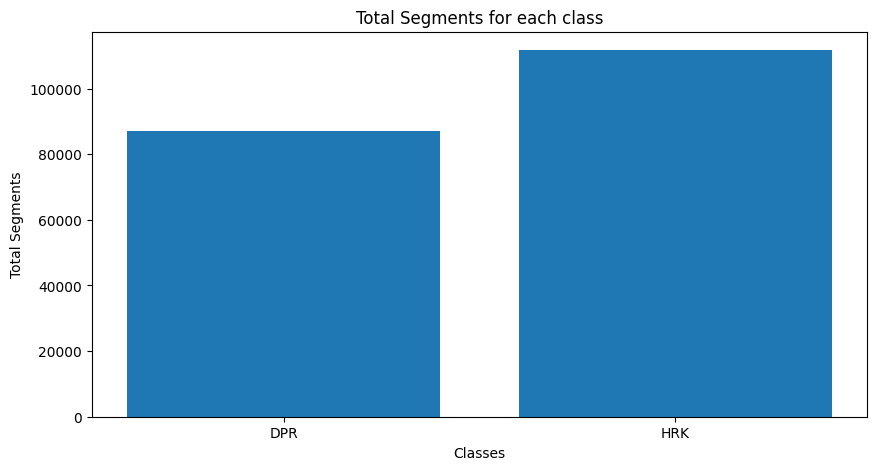

In [19]:
plot_segments(y, mapping)

In [20]:
def calculate_f_ratios(mfcc_data, labels):
    f_ratios = []
    n_mfcc = mfcc_data.shape[2]  # 16 MFCCs
    
    for i in range(n_mfcc):
        class_data = [mfcc_data[labels == label, 0, i] for label in np.unique(labels)]
        
        f_val, p_val = f_oneway(*class_data)
        f_ratios.append(f_val)
    
    return f_ratios

In [21]:
def get_top_3_coefficients(f_ratios):
    return np.argsort(f_ratios)[-3:]

In [22]:
def plot_3d_interactive(mfcc_data, labels, top_3_indices, label_mapping):
    x = mfcc_data[:, 0, top_3_indices[0]]
    y = mfcc_data[:, 0, top_3_indices[1]]
    z = mfcc_data[:, 0, top_3_indices[2]]
    
    labels = [label_mapping[label] for label in labels]

    df = pd.DataFrame({
        f'MFCC {top_3_indices[0] + 1}': x,
        f'MFCC {top_3_indices[1] + 1}': y,
        f'MFCC {top_3_indices[2] + 1}': z,
        'Class': labels
    })
    
    fig = px.scatter_3d(df, 
                        x=f'MFCC {top_3_indices[0] + 1}', 
                        y=f'MFCC {top_3_indices[1] + 1}', 
                        z=f'MFCC {top_3_indices[2] + 1}', 
                        color='Class', 
                        title='3D Scatter Plot of Top 3 MFCC Coefficients')
    
    fig.write_html("top3-MFCC_plot.html")
    print("DONE")

In [23]:
f_ratios = calculate_f_ratios(X, y)
print(f_ratios)

[65372.938460959296, 6170.509922890897, 11990.129395216245, 1761.4665565180155, 2612.7778009443896, 1811.6186668226346, 1290.988342034881, 2397.8409904041755, 1632.6064665060373, 1478.3025275431276, 4423.02950344198, 341.6800577153667, 2104.3441690961076, 8233.039170168036, 141.10831448800704, 541.0351629075827]


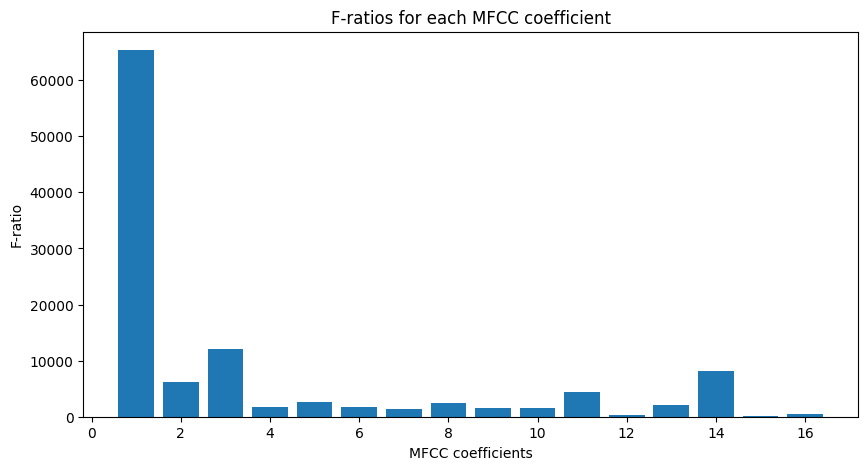

In [24]:
# draw the F-ratios
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, 17), f_ratios)
plt.xlabel("MFCC coefficients")
plt.ylabel("F-ratio")
plt.title("F-ratios for each MFCC coefficient")
plt.show()

In [25]:
# rank the F-ratios
sorted_indices = np.argsort(f_ratios)[::-1] + 1
print(sorted_indices)

[ 1  3 14  2 11  5  8 13  6  4  9 10  7 16 12 15]


In [26]:
top_3_indices = get_top_3_coefficients(f_ratios)

# only keep the first 1000 samples for each class to speed up the computation
# random it
# np.random.seed(0)
# indices = np.arange(X.shape[0])
# np.random.shuffle(indices)

# X = X[indices]
# y = y[indices]

X = np.concatenate([X[y == label][:1000] for label in np.unique(y)], axis=0)
y = np.concatenate([np.full(1000, label) for label in np.unique(y)], axis=0)

plot_3d_interactive(X, y, top_3_indices, mapping)

DONE
